# Project Title: Crop Type Mapping in Godagari Upazila using Sentinel-2 Time Series Data and Machine Learning Algorithms 
## Group-3 Members:
1. Shakhawat Hossain, Research Assistant, ASICT Division, BARI.
2. AFM Tariqul Islam, Senior Scientific Officer, ASICT Division, BARI.
3. Mst. Salina Akter, Scientific Officer, PBD, BARI.
4. Nasrin Sultana, Senior Scientific Officer, SPARRSO.
5. Md. Golam Mahboob, Senior Scientific Officer, ASICT Division, BARI

# Pre-processing
Here Sentinel-2 images will be processed using Google Earth Engine API and geemap library. Using the Study area shapefile (Godagari) an NDVI image will be derived for the time period during October 2020 to March 2021.

## Installation of geemap
A Python package for interactive mapping with Google Earth Engine, ipyleaflet, and ipywidgets.

geemap is a Python package for interactive mapping with Google Earth Engine (GEE), which is a cloud computing platform with a multi-petabyte catalog of satellite imagery and geospatial datasets. geemap is intended for students and researchers, who would like to utilize the Python ecosystem of diverse libraries and tools to explore Google Earth Engine. It is also designed for existing GEE users who would like to transition from the GEE JavaScript API to Python API. The automated JavaScript-to-Python conversion module of the geemap package can greatly reduce the time needed to convert existing GEE JavaScripts to Python scripts and Jupyter notebooks.

For more details: https://geemap.org/ 

### Earth Engine Account
To use geemap, you must first sign up for a Google Earth Engine account. You cannot use Google Earth Engine unless your application has been approved. Once you receive the application approval email, you can log in to the Earth Engine Code Editor to get familiar with the JavaScript API.

### Install geemap
geemap is available on PyPI. To install geemap, run the command below:

In [1]:
# pip install geemap

### Upgrade geemap
If you have installed geemap before and want to upgrade to the latest version, you can run the following command below:

In [2]:
# pip install -U geemap

To install the development version from GitHub directly within Jupyter notebook without using Git, run the following code:

In [3]:
# import geemap
# geemap.update_package()

Please comment out 'geemap.update_package()', 'pip install geemap', 'pip install -U geemap' and restart the kernel to take effect:
Jupyter menu -> Kernel -> Restart & Clear Output

### Import libraries

In [1]:
import ee
import geemap

Trigger the authentication flow (Optional). If Initialization failed then do it and initialize again.

In [2]:
# ee.Authenticate()

Initialize the library.

In [3]:
try:
  ee.Initialize()
  print('Google Earth Engine has initialized successfully!')
except ee.EEException as e:
  print('Google Earth Engine has failed to initialize!')
except:
    print("Unexpected error:", sys.exc_info()[0])
    raise

Google Earth Engine has initialized successfully!


### Create an interactive map

In [4]:
Map = geemap.Map(center=(24.478, 88.43), zoom=11)
Map

Map(center=[24.478, 88.43], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=HBox(childr…

### Add Study area shapefile from your directory

In [5]:
roi = ee.FeatureCollection("users/shohelovro/GodigariUnion") # Read your Study area shape here from uploaded GEE Asset
aoi = roi.geometry()       # Convert Feature Collecion to Geometry as String

### Add Earth Engine data and Filtering

In [7]:
# Dataset for each month
dataset_oct = ee.ImageCollection("COPERNICUS/S2_SR").filterDate('2020-10-01', '2020-10-31').filterBounds(roi).filter('CLOUDY_PIXEL_PERCENTAGE <= 5')
dataset_nov = ee.ImageCollection("COPERNICUS/S2_SR").filterDate('2020-11-01', '2020-11-30').filterBounds(roi).filter('CLOUDY_PIXEL_PERCENTAGE <= 5')
dataset_dec = ee.ImageCollection("COPERNICUS/S2_SR").filterDate('2020-12-01', '2020-12-31').filterBounds(roi).filter('CLOUDY_PIXEL_PERCENTAGE <= 5')
dataset_jan = ee.ImageCollection("COPERNICUS/S2_SR").filterDate('2021-01-01', '2021-01-31').filterBounds(roi).filter('CLOUDY_PIXEL_PERCENTAGE <= 5')
dataset_feb = ee.ImageCollection("COPERNICUS/S2_SR").filterDate('2021-02-01', '2021-02-28').filterBounds(roi).filter('CLOUDY_PIXEL_PERCENTAGE <= 5')
dataset_mar = ee.ImageCollection("COPERNICUS/S2_SR").filterDate('2021-03-01', '2021-03-31').filterBounds(roi).filter('CLOUDY_PIXEL_PERCENTAGE <= 5')

### Median NDVI calculation and clip to the study area 

In [10]:
# Oct
RGB_oct = dataset_oct.median().select('B4', 'B3', 'B2', 'B8', 'QA60')
RGB1_oct = RGB_oct.clip(roi)                                         # Output RGB Image of Study Area
ndvi_oct = RGB_oct.normalizedDifference(['B8', 'B4'])
ndvi_oct = ndvi_oct.clip(roi)                                        # Output NDVI Image of Study Area
# Nov
RGB_nov = dataset_nov.median().select('B4', 'B3', 'B2', 'B8', 'QA60')
RGB2_nov = RGB_nov.clip(roi)                                         # Output RGB Image of Study Area (Optional)
ndvi_nov = RGB_nov.normalizedDifference(['B8', 'B4'])
ndvi_nov = ndvi_nov.clip(roi)                                        # Output NDVI Image of Study Area
# Dec
RGB_dec = dataset_dec.median().select('B4', 'B3', 'B2', 'B8', 'QA60')
RGB3_dec = RGB_dec.clip(roi)                                         # Output RGB Image of Study Area (Optional)
ndvi_dec = RGB_dec.normalizedDifference(['B8', 'B4'])
ndvi_dec = ndvi_dec.clip(roi)                                        # Output NDVI Image of Study Area
# Jan
RGB_jan = dataset_jan.median().select('B4', 'B3', 'B2', 'B8', 'QA60')
RGB4_jan = RGB_jan.clip(roi)                                         # Output RGB Image of Study Area (Optional)
ndvi_jan = RGB_jan.normalizedDifference(['B8', 'B4'])
ndvi_jan = ndvi_jan.clip(roi)                                        # Output NDVI Image of Study Area
# Feb
RGB_feb = dataset_feb.median().select('B4', 'B3', 'B2', 'B8', 'QA60')
RGB5_feb = RGB_feb.clip(roi)                                         # Output RGB Image of Study Area (Optional)
ndvi_feb = RGB_feb.normalizedDifference(['B8', 'B4'])
ndvi_feb = ndvi_feb.clip(roi)                                        # Output NDVI Image of Study Area
# Mar
RGB_mar = dataset_feb.median().select('B4', 'B3', 'B2', 'B8', 'QA60')
RGB6_mar = RGB_mar.clip(roi)                                         # Output RGB Image of Study Area (Optional)
ndvi_mar = RGB_mar.normalizedDifference(['B8', 'B4'])
ndvi_mar = ndvi_mar.clip(roi)                                        # Output NDVI Image of Study Area

### Set visualization parameters

In [11]:
rgb_vis = {'min':0, 'max':3000, 'bands':['B4','B3','B2']}
ndvi_colorizedVis = {"min":0,"max":1,"palette":["FFFFFF","CE7E45","DF923D", \
                    "F1B555","FCD163","99B718","74A901","66A000","529400","3E8601",\
                    "207401","056201","004C00","023B01","012E01","011D01","011301"]}

### Display data on the map

In [16]:
Map.addLayer(roi)
Map.addLayer(ndvi_oct, ndvi_colorizedVis, 'NDVI Oct20')
Map.addLayer(ndvi_nov, ndvi_colorizedVis, 'NDVI Nov20')
Map.addLayer(ndvi_dec, ndvi_colorizedVis, 'NDVI Dec20')
Map.addLayer(ndvi_jan, ndvi_colorizedVis, 'NDVI Jan21')
Map.addLayer(ndvi_feb, ndvi_colorizedVis, 'NDVI Feb21')
Map.addLayer(ndvi_mar, ndvi_colorizedVis, 'NDVI Mar21')
Map.centerObject(roi, 13)

### Save a GeoTIFF file in Google Drive

In [17]:
task_oct = ee.batch.Export.image.toDrive(image=ndvi_oct,description='GodagariUnion_NDVI_oct',scale=10,region=aoi,
                                     fileNamePrefix='GodagariUnion_NDVI_oct',                            # Specify output file name
                                     crs='EPSG:4326',
                                     fileFormat='GeoTIFF')
task_nov = ee.batch.Export.image.toDrive(image=ndvi_nov,description='GodagariUnion_NDVI_nov',scale=10,region=aoi,
                                     fileNamePrefix='GodagariUnion_NDVI_nov',                            # Specify output file name
                                     crs='EPSG:4326',
                                     fileFormat='GeoTIFF')
task_dec = ee.batch.Export.image.toDrive(image=ndvi_dec,description='GodagariUnion_NDVI_dec',scale=10,region=aoi,
                                     fileNamePrefix='GodagariUnion_NDVI_dec',                            # Specify output file name
                                     crs='EPSG:4326',
                                     fileFormat='GeoTIFF')
task_jan = ee.batch.Export.image.toDrive(image=ndvi_jan,description='GodagariUnion_NDVI_jan',scale=10,region=aoi,
                                     fileNamePrefix='GodagariUnion_NDVI_jan',                            # Specify output file name
                                     crs='EPSG:4326',
                                     fileFormat='GeoTIFF')
task_feb = ee.batch.Export.image.toDrive(image=ndvi_feb,description='GodagariUnion_NDVI_feb',scale=10,region=aoi,
                                     fileNamePrefix='GodagariUnion_NDVI_feb',                            # Specify output file name
                                     crs='EPSG:4326',
                                     fileFormat='GeoTIFF')
task_mar = ee.batch.Export.image.toDrive(image=ndvi_mar,description='GodagariUnion_NDVI_mar',scale=10,region=aoi,
                                     fileNamePrefix='GodagariUnion_NDVI_mar',                            # Specify output file name
                                     crs='EPSG:4326',
                                     fileFormat='GeoTIFF')
task_oct.start()
task_nov.start()
task_dec.start()
task_jan.start()
task_feb.start()
task_mar.start()

#### Checking the Task
Depending on the size of the request, this cell might run several times until the task state becomes 'COMPLETED' (in order, the state of the export task is 'READY', then 'RUNNING', and finally 'COMPLETED').

In [26]:
# Uncomment which one to check
# task_oct.status()
# task_nov.status()
# task_dec.status()
# task_jan.status()
# task_feb.status()
task_mar.status()

{'state': 'COMPLETED',
 'description': 'GodagariUnion_NDVI_mar',
 'creation_timestamp_ms': 1636561558140,
 'update_timestamp_ms': 1636561688784,
 'start_timestamp_ms': 1636561668132,
 'task_type': 'EXPORT_IMAGE',
 'destination_uris': ['https://drive.google.com/'],
 'attempt': 1,
 'id': 'VZQOPBL3IMVQIMGV3GD55UIA',
 'name': 'projects/earthengine-legacy/operations/VZQOPBL3IMVQIMGV3GD55UIA'}


### Output from this section:
1. Median NDVI image for Godagari Upazila as "ndvi".
2. RGB Image of Godagari Upazila as "RGB_Godagari" (Optional).

## END Preprocessing

# Image Classification using Machine Learning Algorithm
Field data have been collected and processed with the help of ArcGIS which will be used here as Ground Truth data for training and testing purposes. The classifier will be then tested using Random Forest (RF) and Artificial Neural Network (ANN) algorithms.  

### Ground Truth Data Processing

In [31]:
# Read the shapefile data
import geopandas as gpd

path = r'/data/private/Group 3 Project/Data/Sample Points/all_ndvi.shp'
data = gpd.read_file(path)
data.head()

,Crop_Type,oct_mar,oct,nov,dec,jan,feb,mar,geometry
0,Wheat,0.563385,0.762423,0.269278,0.303974,0.414619,0.680760,0.576538,POINT (88.50077 24.44850)
1,Wheat,0.615016,0.807328,0.553797,0.475296,0.587821,0.673952,0.381785,POINT (88.35990 24.52580)
2,Wheat,0.500000,0.777340,0.302041,0.453583,0.547170,0.573996,0.391710,POINT (88.35422 24.52559)
3,Wheat,0.443068,0.792300,0.257036,0.542275,0.535628,0.590452,0.325093,POINT (88.33946 24.51738)
4,Wheat,0.548165,0.757240,0.269365,0.200193,0.381998,0.678979,0.663806,POINT (88.48164 24.50280)


In [32]:
# Get Data info (Optional)
print(type(data))
print("Shape",data.shape)
print(data.dtypes)

<class 'geopandas.geodataframe.GeoDataFrame'>
Shape (527, 9)
Crop_Type      object
oct_mar       float64
oct           float64
nov           float64
dec           float64
jan           float64
feb           float64
mar           float64
geometry     geometry
dtype: object


#### Assigning NDVI values to X variable

In [33]:
X = data.iloc[:, 2:8]
X

,oct,nov,dec,jan,feb,mar
0,0.762423,0.269278,0.303974,0.414619,0.680760,0.576538
1,0.807328,0.553797,0.475296,0.587821,0.673952,0.381785
2,0.777340,0.302041,0.453583,0.547170,0.573996,0.391710
3,0.792300,0.257036,0.542275,0.535628,0.590452,0.325093
4,0.757240,0.269365,0.200193,0.381998,0.678979,0.663806
...,...,...,...,...,...,...
522,0.727731,0.339921,0.266073,0.405106,0.621291,0.442745
523,0.835718,0.733968,0.178656,0.150056,0.404415,0.569571
524,0.706390,0.263634,0.162645,0.194277,0.431179,0.491766
525,0.823547,0.697981,0.275225,0.363515,0.473027,0.388697


#### Assigning Target Variables (Crop Types) to y variable

In [34]:
y = data.select_dtypes(include=[object])
y

,Crop_Type
0,Wheat
1,Wheat
2,Wheat
3,Wheat
4,Wheat
...,...
522,Chickpea
523,Chickpea
524,Chickpea
525,Chickpea


In [35]:
# Check Variable Info. (Optional)
print(type(X), type(y))
print(y.Crop_Type.unique())

<class 'geopandas.geodataframe.GeoDataFrame'> <class 'geopandas.geodataframe.GeoDataFrame'>
['Wheat' 'Rice' 'Potato' 'Others' 'Mustard' 'Maize' 'Lentil' 'Chickpea']


In [36]:
#convert these categorical values to numerical values
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

ct2num = le.fit(['Wheat', 'Rice', 'Potato', 'Others', 'Mustard', 'Maize', 'Lentil','Chickpea'])

y = y.apply(le.fit_transform)
y

,Crop_Type
0,7
1,7
2,7
3,7
4,7
...,...
522,0
523,0
524,0
525,0


In [37]:
# Check Variable Info. (Optional)
print(type(X), type(y))
print(y.Crop_Type.unique())

import numpy as np

nclass = np.max(y)
print("Total Class:", nclass)

<class 'geopandas.geodataframe.GeoDataFrame'> <class 'geopandas.geodataframe.GeoDataFrame'>
[7 6 5 4 3 2 1 0]
Total Class: Crop_Type    7
dtype: int64


#### Split Train & Test datasets 

In [60]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30)

print("Train_Test Split of X", X_train.shape, X_test.shape)
print("Train_Test Split of y", y_train.shape, y_test.shape)

Train_Test Split of X (368, 6) (159, 6)
Train_Test Split of y (368, 1) (159, 1)


### Train the Model

In [61]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=50) # Try with different number of estimators
rf = rf.fit(X_train, y_train.values.ravel())

### Model Prediction

In [62]:
Y_pred = rf.predict(X_test)

### Model Evaluation by Accuracy Check

In [63]:
from sklearn.metrics import accuracy_score

pa_rf = accuracy_score(y_test, Y_pred, normalize=False)
Class_Acc_RF = pa_rf/len(y_test)
print("Classification accuracy of RF is", Class_Acc_RF)

Classification accuracy of RF is 0.9182389937106918


### Outputs from this section
1. Reading Ground Truth Data for model usage
2. Split the data into train and test based on 70:30 ratio
3. Fit the model using Random Forest (RF) classifier 
4. Model evaluation using Accuracy Assessment

N.B. If the Accuracy is found unsatisfactory then run the codes several times from "Split Train & Test datasets" again and again till satisfactory accuracy is attained.  

#### Model Prepared (rf = Random Forest)
Process End

## Image Classification

### Read Sentinel-2 derived NDVI images
Firstly, download the pre-processed NDVI images of the study area from Google Drive and then re-upload those in a data readable path with respect to API and computational platforms.  

In [70]:
import georasters as gr

oct = gr.from_file('/data/private/Group 3 Project/Data/NDVI_Clip/GodagariUnion_NDVI_oct.tif')
nov = gr.from_file('/data/private/Group 3 Project/Data/NDVI_Clip/GodagariUnion_NDVI_nov.tif')
dec = gr.from_file('/data/private/Group 3 Project/Data/NDVI_Clip/GodagariUnion_NDVI_dec.tif')
jan = gr.from_file('/data/private/Group 3 Project/Data/NDVI_Clip/GodagariUnion_NDVI_jan.tif')
feb = gr.from_file('/data/private/Group 3 Project/Data/NDVI_Clip/GodagariUnion_NDVI_feb.tif')
mar = gr.from_file('/data/private/Group 3 Project/Data/NDVI_Clip/GodagariUnion_NDVI_mar.tif')

(<AxesSubplot:>, <AxesSubplot:>)

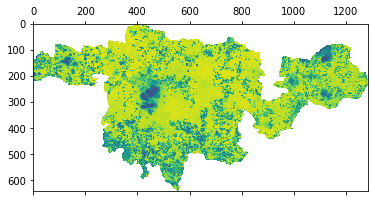

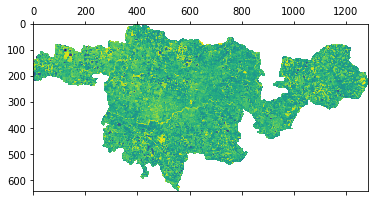

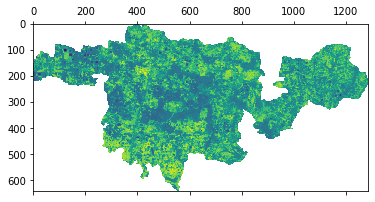

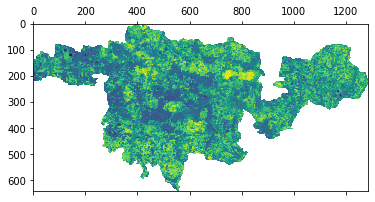

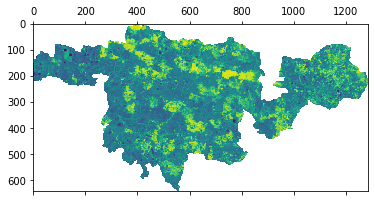

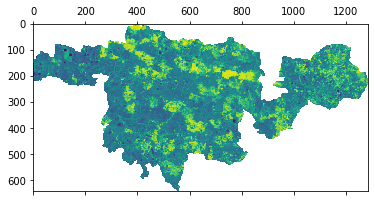

In [71]:
# Visualize the Data
import matplotlib.pyplot as plt

oct.plot(), nov.plot(),
dec.plot(), jan.plot(),
feb.plot(), mar.plot()

### Convert to Pandas DataFrame

In [72]:
df_oct = oct.to_pandas()
df_nov = nov.to_pandas()
df_dec = dec.to_pandas()
df_jan = jan.to_pandas()
df_feb = feb.to_pandas()
df_mar = mar.to_pandas()

# print(df_nov) # Uncomment to visualize (Optional) 

In [73]:
# Column Reduction and Rename Column Headers

df_oct = df_oct.loc[:, ['value', 'x', 'y']]
df_oct = df_oct.rename(columns = {'value':'oct', 'x':'Longitude', 'y':'Latitude'})

df_nov = df_nov.loc[:, ['value', 'x', 'y']]
df_nov = df_nov.rename(columns = {'value':'nov', 'x':'Longitude', 'y':'Latitude'})

df_dec = df_dec.loc[:, ['value', 'x', 'y']]
df_dec = df_dec.rename(columns = {'value':'dec', 'x':'Longitude', 'y':'Latitude'})

df_jan = df_jan.loc[:, ['value', 'x', 'y']]
df_jan = df_jan.rename(columns = {'value':'jan', 'x':'Longitude', 'y':'Latitude'})

df_feb = df_feb.loc[:, ['value', 'x', 'y']]
df_feb = df_feb.rename(columns = {'value':'feb', 'x':'Longitude', 'y':'Latitude'})

df_mar = df_mar.loc[:, ['value', 'x', 'y']]
df_mar = df_mar.rename(columns = {'value':'mar', 'x':'Longitude', 'y':'Latitude'})

In [76]:
# Check Outout DataFrame (Optional)
df_nov.head(), df_jan.head(), df_feb.head()

(        nov  Longitude   Latitude
 0  0.303599  88.354608  24.507927
 1  0.342894  88.354429  24.507838
 2  0.311614  88.354518  24.507838
 3  0.277065  88.354608  24.507838
 4  0.297344  88.354698  24.507838,
         jan  Longitude   Latitude
 0  0.478306  88.354608  24.507927
 1  0.424726  88.354429  24.507838
 2  0.500000  88.354518  24.507838
 3  0.518766  88.354608  24.507838
 4  0.485654  88.354698  24.507838,
         feb  Longitude   Latitude
 0  0.663725  88.354608  24.507927
 1  0.621938  88.354429  24.507838
 2  0.653066  88.354518  24.507838
 3  0.673043  88.354608  24.507838
 4  0.666442  88.354698  24.507838)

In [77]:
# Get info (Optional)
df_oct.shape, df_nov.shape, df_dec.shape, df_jan.shape, df_feb.shape, df_mar.shape

((383476, 3), (383476, 3), (383476, 3), (383476, 3), (383476, 3), (383476, 3))

### Join All months NDVI value in Pandas DataFrame

In [78]:
import pandas as pd

df = pd.concat([df_oct['oct'],df_nov['nov'], df_dec['dec'],df_jan['jan'],df_feb['feb'],df_mar], axis=1)
df

,oct,nov,dec,jan,feb,mar,Longitude,Latitude
0,0.773019,0.303599,0.340757,0.478306,0.663725,0.663725,88.354608,24.507927
1,0.784959,0.342894,0.300921,0.424726,0.621938,0.621938,88.354429,24.507838
2,0.785834,0.311614,0.342995,0.500000,0.653066,0.653066,88.354518,24.507838
3,0.775465,0.277065,0.323198,0.518766,0.673043,0.673043,88.354608,24.507838
4,0.780549,0.297344,0.318510,0.485654,0.666442,0.666442,88.354698,24.507838
...,...,...,...,...,...,...,...,...
383471,0.221493,0.223306,0.210970,0.210907,0.133315,0.133315,88.368802,24.450345
383472,0.651478,0.392342,0.286049,0.255758,0.228503,0.228503,88.368263,24.450256
383473,0.526914,0.402469,0.226364,0.192785,0.182061,0.182061,88.368352,24.450256
383474,0.669811,0.553769,0.338691,0.320253,0.280530,0.280530,88.368442,24.450256


### Converting Pandas DataFrame to Geopandas DataFrame

In [79]:
import geopandas as gpd
import matplotlib.pyplot as plt

gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.Longitude, df.Latitude))
gdf

,oct,nov,dec,jan,feb,mar,Longitude,Latitude,geometry
0,0.773019,0.303599,0.340757,0.478306,0.663725,0.663725,88.354608,24.507927,POINT (88.35461 24.50793)
1,0.784959,0.342894,0.300921,0.424726,0.621938,0.621938,88.354429,24.507838,POINT (88.35443 24.50784)
2,0.785834,0.311614,0.342995,0.500000,0.653066,0.653066,88.354518,24.507838,POINT (88.35452 24.50784)
3,0.775465,0.277065,0.323198,0.518766,0.673043,0.673043,88.354608,24.507838,POINT (88.35461 24.50784)
4,0.780549,0.297344,0.318510,0.485654,0.666442,0.666442,88.354698,24.507838,POINT (88.35470 24.50784)
...,...,...,...,...,...,...,...,...,...
383471,0.221493,0.223306,0.210970,0.210907,0.133315,0.133315,88.368802,24.450345,POINT (88.36880 24.45035)
383472,0.651478,0.392342,0.286049,0.255758,0.228503,0.228503,88.368263,24.450256,POINT (88.36826 24.45026)
383473,0.526914,0.402469,0.226364,0.192785,0.182061,0.182061,88.368352,24.450256,POINT (88.36835 24.45026)
383474,0.669811,0.553769,0.338691,0.320253,0.280530,0.280530,88.368442,24.450256,POINT (88.36844 24.45026)


### Assigning NDVI pixel values to X variable

In [80]:
X = gdf.iloc[:, :6]
X

,oct,nov,dec,jan,feb,mar
0,0.773019,0.303599,0.340757,0.478306,0.663725,0.663725
1,0.784959,0.342894,0.300921,0.424726,0.621938,0.621938
2,0.785834,0.311614,0.342995,0.500000,0.653066,0.653066
3,0.775465,0.277065,0.323198,0.518766,0.673043,0.673043
4,0.780549,0.297344,0.318510,0.485654,0.666442,0.666442
...,...,...,...,...,...,...
383471,0.221493,0.223306,0.210970,0.210907,0.133315,0.133315
383472,0.651478,0.392342,0.286049,0.255758,0.228503,0.228503
383473,0.526914,0.402469,0.226364,0.192785,0.182061,0.182061
383474,0.669811,0.553769,0.338691,0.320253,0.280530,0.280530


In [81]:
# Get Variable Info. (Optional)
type(X), X.ndim, X.shape, X.size 

(geopandas.geodataframe.GeoDataFrame, 2, (383476, 6), 2300856)

### Predict Crop Types (Image Classification)

In [82]:
Y_pred_X = rf.predict(X)

In [83]:
# Check Prediction Outputs
Y_pred_X

array([7, 7, 7, ..., 4, 4, 4])

In [84]:
# Get Variable Info. (Optional)
type(Y_pred_X), Y_pred_X.dtype, Y_pred_X.ndim, Y_pred_X.shape, Y_pred_X.size

(numpy.ndarray, dtype('int64'), 1, (383476,), 383476)

# Plot Final Classified Crop Type Map of the Study Area

In [91]:
# Convert these numerical values to categorical values
X_Class = le.inverse_transform(Y_pred_X)
X_Class

array(['Wheat', 'Wheat', 'Wheat', ..., 'Others', 'Others', 'Others'],
      dtype=object)

In [92]:
# Convert array to Pandas DataFrame
df_X = pd.DataFrame(X_Class)
df_X

,0
0,Wheat
1,Wheat
2,Wheat
3,Wheat
4,Wheat
...,...
383471,Others
383472,Others
383473,Others
383474,Others


In [93]:
# Rename Column Header in the DataFrame
df_X_New = df_X.rename({0: 'Crop Type'}, axis='columns')
df_X_New

,Crop Type
0,Wheat
1,Wheat
2,Wheat
3,Wheat
4,Wheat
...,...
383471,Others
383472,Others
383473,Others
383474,Others


In [94]:
# Convert Pandas DataFrame to Geopandas DataFrame
gdf_X = gpd.GeoDataFrame(df_X_New, geometry=gpd.points_from_xy(gdf.Longitude, gdf.Latitude))
gdf_X

,Crop Type,geometry
0,Wheat,POINT (88.35461 24.50793)
1,Wheat,POINT (88.35443 24.50784)
2,Wheat,POINT (88.35452 24.50784)
3,Wheat,POINT (88.35461 24.50784)
4,Wheat,POINT (88.35470 24.50784)
...,...,...
383471,Others,POINT (88.36880 24.45035)
383472,Others,POINT (88.36826 24.45026)
383473,Others,POINT (88.36835 24.45026)
383474,Others,POINT (88.36844 24.45026)


<AxesSubplot:title={'center':'Crop Type Classification from Sentinel-2 Images'}>

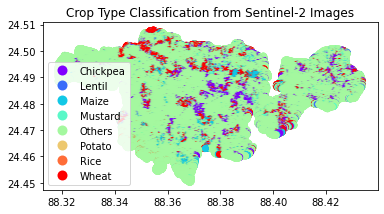

In [97]:
fig, ax = plt.subplots(1, 1)
ax.set_title("Crop Type Classification from Sentinel-2 Images",color='black')
# ax.legend(bbox_to_anchor=(1.0, 1.0))

gdf_X.plot(column='Crop Type', cmap='rainbow', ax=ax, legend=True)

# END of the Project